# Cat Boost Classifier - Example 1 (Data Train)

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('../Auditorium-Exercises/data/data_train.csv')

In [3]:
df.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,surgical_lesion,lesion_1,cp_data,outcome
0,0,1,0,530001,38.1,132.0,24.0,2,6.5,57.0,8.5,3.4,1,2209,0,died
1,1,1,0,533836,37.5,88.0,12.0,2,2.0,33.0,64.0,2.0,1,2208,0,euthanized
2,2,1,0,529812,38.3,120.0,28.0,2,3.5,37.0,6.4,3.4,1,5124,0,lived
3,3,1,0,5262541,37.1,72.0,30.0,1,2.0,53.0,7.0,3.9,1,2208,1,lived
4,4,0,0,5299629,38.0,52.0,48.0,3,7.0,47.0,7.3,2.6,0,0,1,lived


In [4]:
df['outcome'].unique()

array(['died', 'euthanized', 'lived'], dtype=object)

In [5]:
X = df.drop('outcome', axis=1)
Y = df['outcome']

<Axes: >

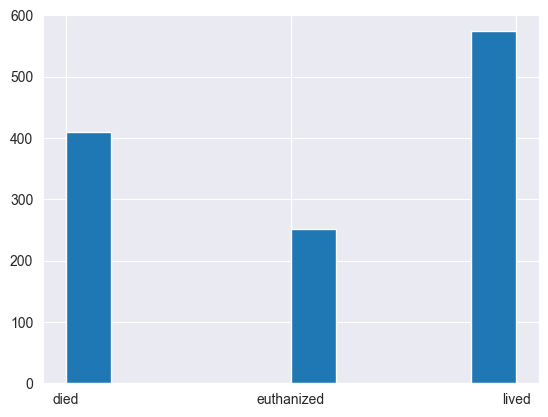

In [6]:
Y.hist()

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [8]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
Y_train = enc.fit_transform(Y_train)
Y_test = enc.transform(Y_test)

In [10]:
from catboost import CatBoostClassifier

model = CatBoostClassifier()

model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

Learning rate set to 0.079078
0:	learn: 1.0617137	total: 148ms	remaining: 2m 27s
1:	learn: 1.0300736	total: 151ms	remaining: 1m 15s
2:	learn: 0.9995231	total: 155ms	remaining: 51.6s
3:	learn: 0.9756977	total: 158ms	remaining: 39.4s
4:	learn: 0.9536749	total: 162ms	remaining: 32.2s
5:	learn: 0.9336464	total: 166ms	remaining: 27.5s
6:	learn: 0.9172138	total: 169ms	remaining: 24s
7:	learn: 0.8990874	total: 173ms	remaining: 21.4s
8:	learn: 0.8841423	total: 176ms	remaining: 19.4s
9:	learn: 0.8701634	total: 180ms	remaining: 17.8s
10:	learn: 0.8564008	total: 184ms	remaining: 16.5s
11:	learn: 0.8437551	total: 188ms	remaining: 15.5s
12:	learn: 0.8332716	total: 192ms	remaining: 14.6s
13:	learn: 0.8218272	total: 197ms	remaining: 13.9s
14:	learn: 0.8120527	total: 204ms	remaining: 13.4s
15:	learn: 0.8027856	total: 210ms	remaining: 12.9s
16:	learn: 0.7935571	total: 220ms	remaining: 12.7s
17:	learn: 0.7873017	total: 228ms	remaining: 12.4s
18:	learn: 0.7801982	total: 237ms	remaining: 12.2s
19:	learn: 

In [11]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test,Y_pred)

0.6680161943319838

# Cat Boost Regressor - Example 2 (Data Train)

In [12]:
from catboost import CatBoostRegressor
model = CatBoostRegressor()

model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

Learning rate set to 0.040865
0:	learn: 0.8746869	total: 3.3ms	remaining: 3.29s
1:	learn: 0.8678557	total: 5.23ms	remaining: 2.61s
2:	learn: 0.8602851	total: 6.96ms	remaining: 2.31s
3:	learn: 0.8541619	total: 10.3ms	remaining: 2.56s
4:	learn: 0.8478707	total: 13.5ms	remaining: 2.68s
5:	learn: 0.8407885	total: 16.2ms	remaining: 2.69s
6:	learn: 0.8339609	total: 18.6ms	remaining: 2.63s
7:	learn: 0.8283758	total: 20.3ms	remaining: 2.52s
8:	learn: 0.8223746	total: 22ms	remaining: 2.42s
9:	learn: 0.8168823	total: 23.7ms	remaining: 2.35s
10:	learn: 0.8114699	total: 25.3ms	remaining: 2.28s
11:	learn: 0.8071439	total: 27ms	remaining: 2.22s
12:	learn: 0.8023411	total: 28.6ms	remaining: 2.17s
13:	learn: 0.7983927	total: 30.1ms	remaining: 2.12s
14:	learn: 0.7949670	total: 31.7ms	remaining: 2.08s
15:	learn: 0.7901707	total: 33.1ms	remaining: 2.04s
16:	learn: 0.7863674	total: 34.5ms	remaining: 2s
17:	learn: 0.7826388	total: 35.9ms	remaining: 1.96s
18:	learn: 0.7782114	total: 37.3ms	remaining: 1.93s


In [13]:
from sklearn.metrics import mean_absolute_error,r2_score

In [14]:
mean_absolute_error(Y_test,Y_pred)

0.5868874395045385

In [15]:
r2_score(Y_test,Y_pred)

0.3207197024112347